# Task 1: Data Exploration.

# Import the data required python libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Import the data from the data sources.

In [3]:
df=pd.read_csv("DS2_C6_S1_Income_Data_Challenge.csv")
df

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


# Check the structure of data.

In [4]:
df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income_Bracket'],
      dtype='object')

In [5]:
df.shape

(32561, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Gender          32561 non-null  object
 9   Capital_Gain    32561 non-null  int64 
 10  Capital_Loss    32561 non-null  int64 
 11  Hours_Per_Week  32561 non-null  int64 
 12  Native_Country  32561 non-null  object
 13  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [7]:
df.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Summarize the data.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education_Num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital_Gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital_Loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
Hours_Per_Week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


# Task 2: Data Preprocessing and Visualization.

# 1.Check if there are any missing values in any feature. if yes, identity those features.

In [11]:
df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [12]:
for i in df.columns:
        print(i,'===',df[i].unique())

Age === [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
WorkClass === [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Fnlwgt === [ 77516  83311 215646 ...  34066  84661 257302]
Education === [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Education_Num === [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Marital_Status === [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation === [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' 

In [13]:
df.nunique()

Age                  73
WorkClass             9
Fnlwgt            21648
Education            16
Education_Num        16
Marital_Status        7
Occupation           15
Relationship          6
Gender                2
Capital_Gain        119
Capital_Loss         92
Hours_Per_Week       94
Native_Country       42
Income_Bracket        2
dtype: int64

In [14]:
df['WorkClass']=df['WorkClass'].str.replace('[?]','')
df['WorkClass']=df['WorkClass'].fillna('Private')

In [15]:
df['Occupation']=df['Occupation'].str.replace('[?]','')
df['Occupation']=df['Occupation'].fillna('Prof-specialty')

In [16]:
df['Native_Country']=df['Native_Country'].str.replace('[?]','')
df['Native_Country']=df['Native_Country'].fillna('United-State')

# Visualization.

In [17]:
cat=[]
num=[]
for i in df.columns:
    if df[i].nunique()<30:
        cat.append(i)
    else:
        num.append(i)
      

In [18]:
cat

['WorkClass',
 'Education',
 'Education_Num',
 'Marital_Status',
 'Occupation',
 'Relationship',
 'Gender',
 'Income_Bracket']

In [37]:
num

['Age',
 'Fnlwgt',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_Per_Week',
 'Native_Country']

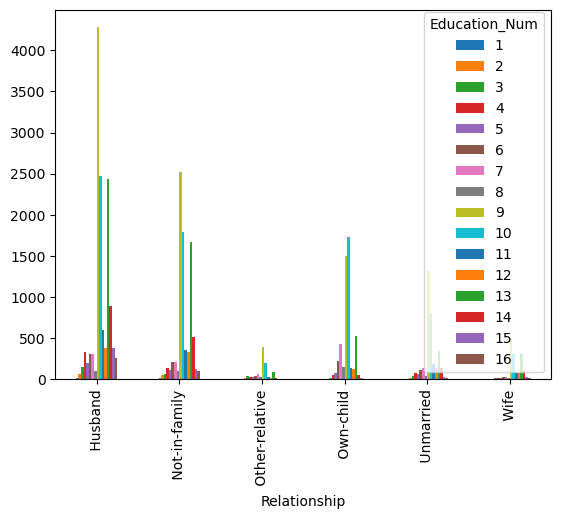

In [31]:
pd.crosstab(df['Relationship'],df['Education_Num']).plot(kind='bar');

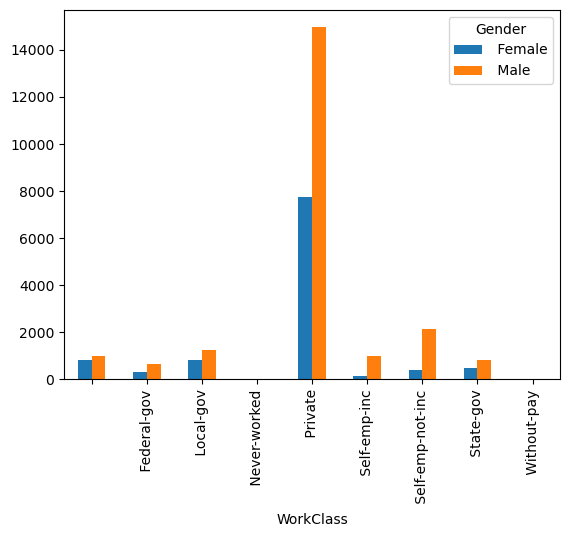

In [23]:
pd.crosstab(df['WorkClass'],df['Gender']).plot(kind='bar');

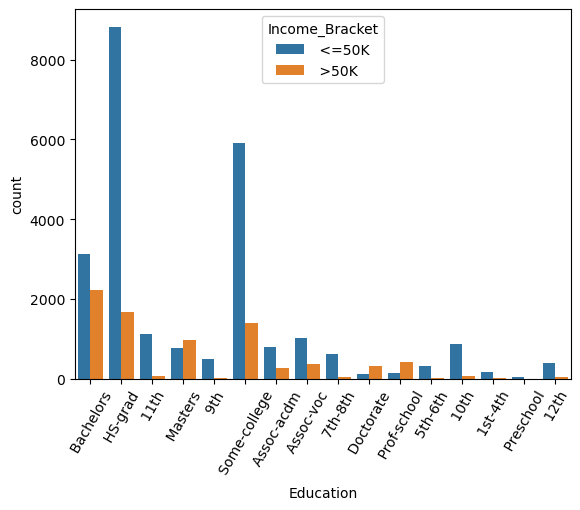

In [28]:
sb.countplot(data=df,x=df['Education'],hue=df['Income_Bracket'])
plt.xticks(rotation=60);

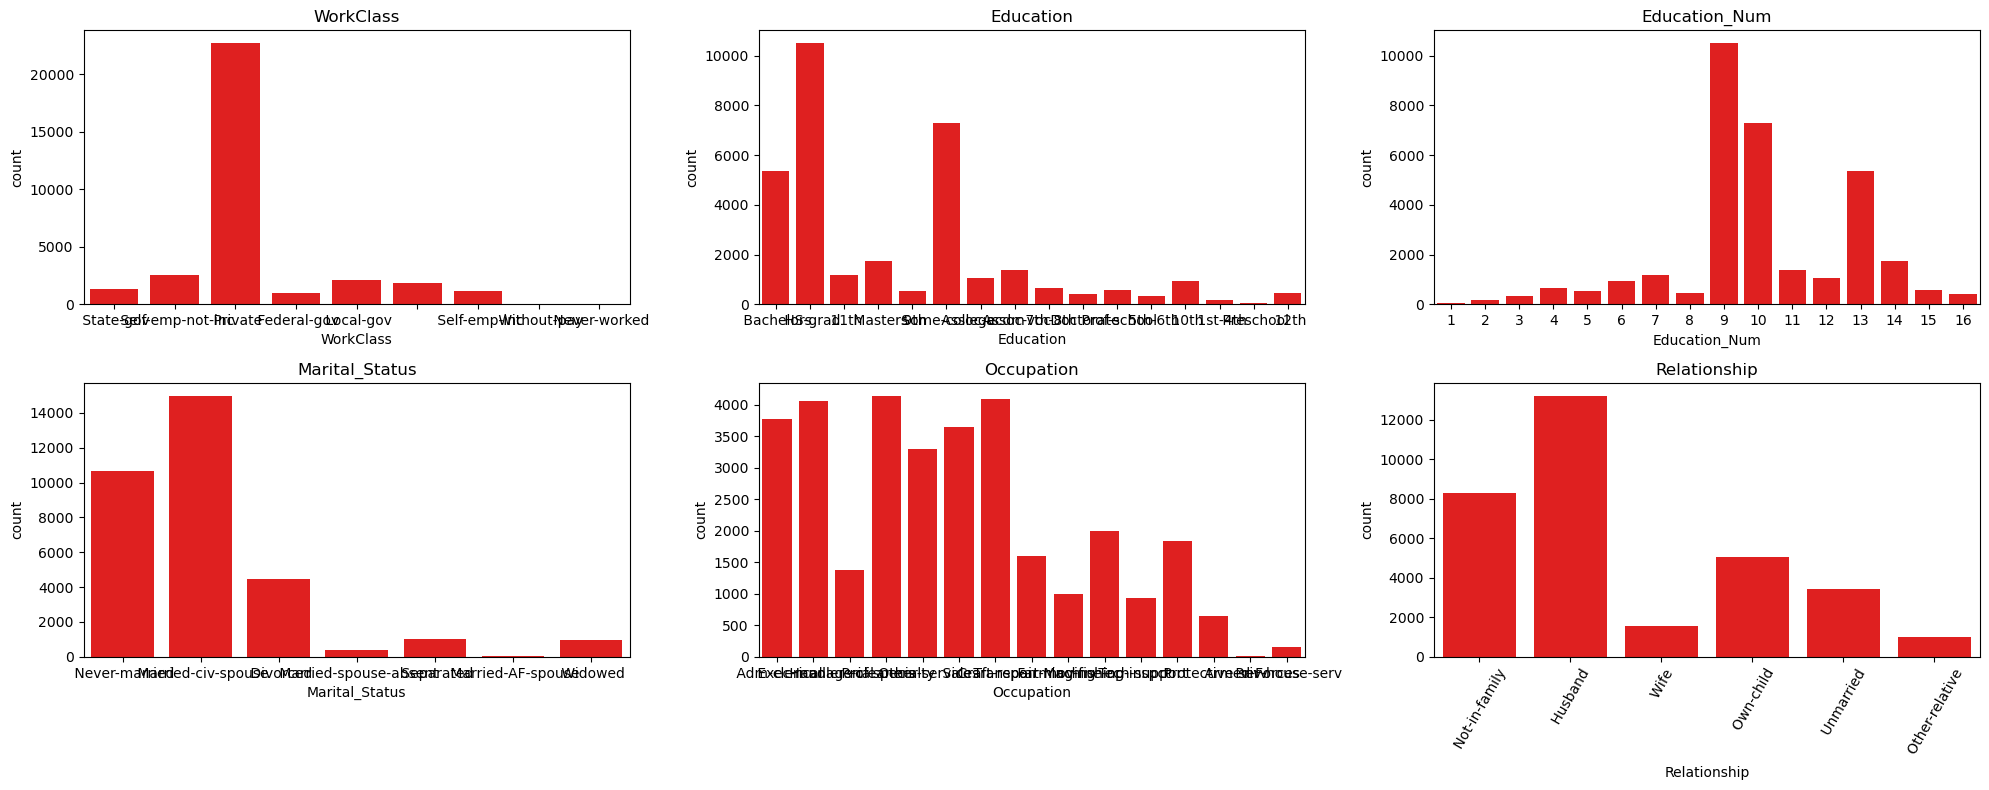

In [64]:
cate_cols=cat
num_cols=3
num_rows=int(len(cate_cols)/num_cols)
fig,axs=plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,8))
for col,ax in zip(cate_cols,axs.flatten()[:len(cate_cols)]):
    sb.countplot(df[col],ax=ax,color='r')
    ax.set_title(col)
plt.xticks(rotation=60)
plt.show()
   


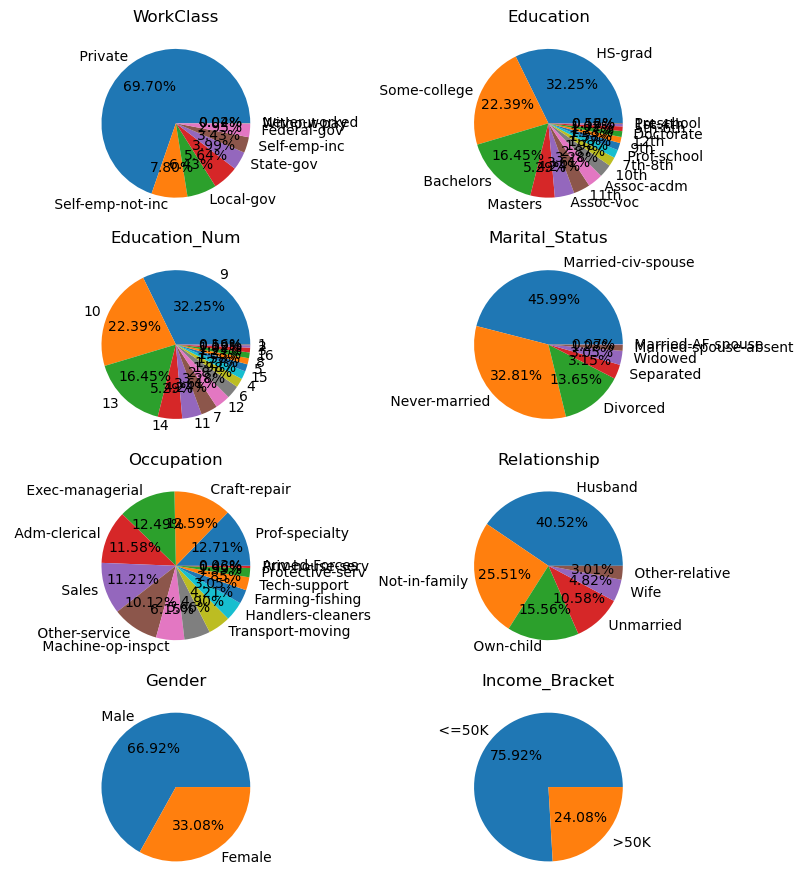

In [52]:
category_cols=cat
num_col=2
num_rows=int(len(category_cols)/num_col)
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(8,9))
for col,ax in zip(category_cols,axs.flatten()[:len(category_cols)]):
    ax.pie(labels=df[col].value_counts().index,x=df[col].value_counts().values,autopct='%.2f%%')
    ax.set_title(col)


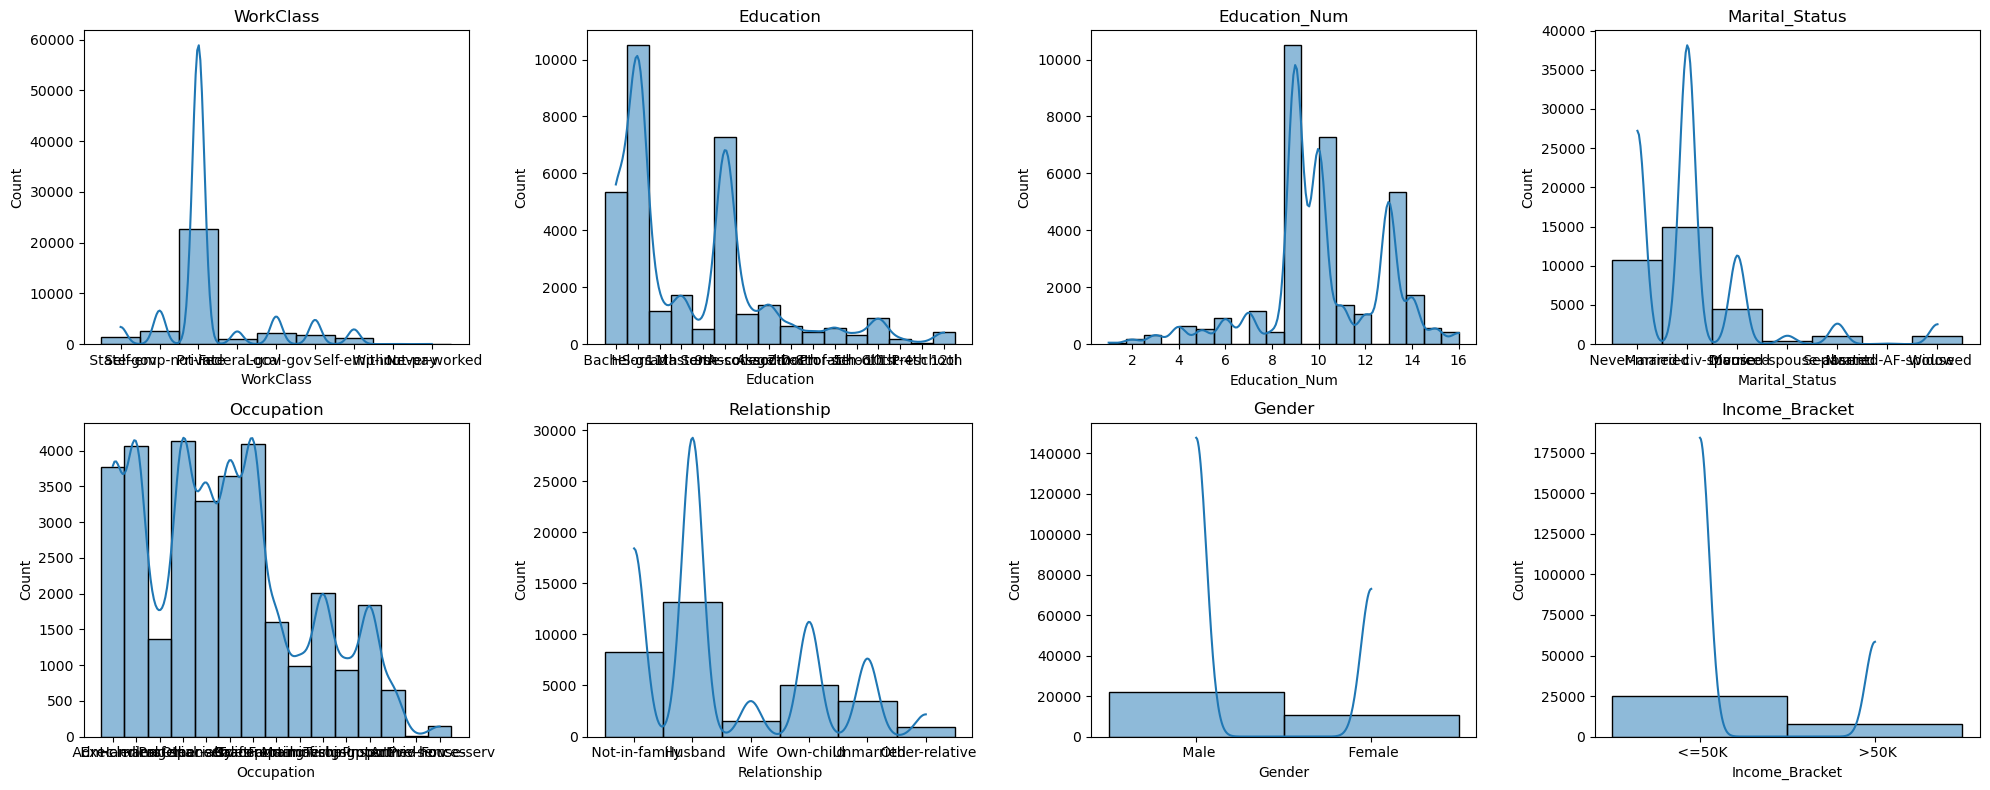

In [61]:
numerical_cols=cat
num_col=4
bins=20
num_rows=int(len(numerical_cols)/num_col)
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(20,8))
for col,ax in zip(numerical_cols,axs.flatten()[:len(numerical_cols)]):
    sb.histplot(df[col],bins=bins,ax=ax,kde=True)
    ax.set_title(col)

# 3.Convert non-numerical labelled columns into categorical type.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Gender          32561 non-null  object
 9   Capital_Gain    32561 non-null  int64 
 10  Capital_Loss    32561 non-null  int64 
 11  Hours_Per_Week  32561 non-null  int64 
 12  Native_Country  32561 non-null  object
 13  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [74]:
df['WorkClass']=df['WorkClass'].astype('category')
df['Education']=df['Education'].astype('category')
df['Marital_Status']=df['Marital_Status'].astype('category')
df['Occupation']=df['Occupation'].astype('category')
df['Relationship']=df['Relationship'].astype('category')
df['Gender']=df['Gender'].astype('category')
df['Native_Country']=df['Native_Country'].astype('category')
df['Income_Bracket']=df['Income_Bracket'].astype('category')

# 4. Use the Label Encoder techinque to convert categorical columns into numerical columns.

In [75]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
df['WorkClass']=a.fit_transform(df['WorkClass'])
df['Education']=a.fit_transform(df['Education'])
df['Marital_Status']=a.fit_transform(df['Marital_Status'])
df['Occupation']=a.fit_transform(df['Occupation'])
df['Relationship']=a.fit_transform(df['Relationship'])
df['Gender']=a.fit_transform(df['Gender'])
df['Native_Country']=a.fit_transform(df['Native_Country'])
df['Income_Bracket']=a.fit_transform(df['Income_Bracket'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32561 non-null  int64
 1   WorkClass       32561 non-null  int32
 2   Fnlwgt          32561 non-null  int64
 3   Education       32561 non-null  int32
 4   Education_Num   32561 non-null  int64
 5   Marital_Status  32561 non-null  int32
 6   Occupation      32561 non-null  int32
 7   Relationship    32561 non-null  int32
 8   Gender          32561 non-null  int32
 9   Capital_Gain    32561 non-null  int64
 10  Capital_Loss    32561 non-null  int64
 11  Hours_Per_Week  32561 non-null  int64
 12  Native_Country  32561 non-null  int32
 13  Income_Bracket  32561 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


# 5.Perform the Data Scaling.

# 6. Select the best features based on correlation values.

In [191]:
df.corr()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
Age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
WorkClass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
Fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
Education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
Education_Num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
Marital_Status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
Occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
Relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
Gender,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980
Capital_Gain,0.077674,0.033835,0.000432,0.030046,0.122630,-0.043393,0.025505,-0.057919,0.048480,1.000000,-0.031615,0.078409,-0.001982,0.223329


In [86]:
Y=[0.057775,0.012216,0.016746,0.079923,0.017987,0.045567,1.000000,0.054256,0.000419,0.150526]

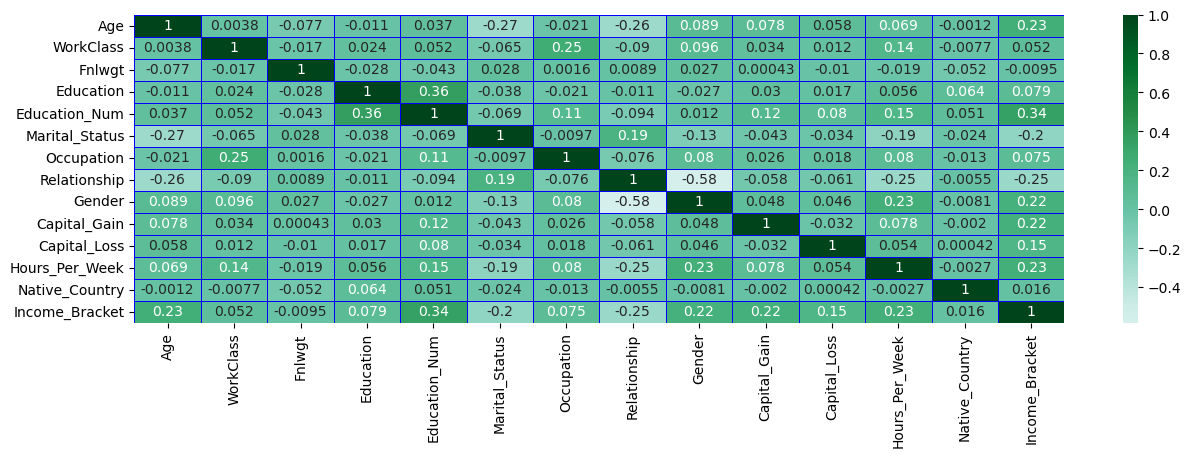

In [85]:
plt.figure(figsize=(15,4))
sb.heatmap(df.corr(),annot=True,linecolor='b',linewidths=.5,cmap='BuGn',center=0);

Conclusion:-Having the high correlation with Fnlwgt.

# 7.Split the data into train and test into 80:20 ration by row index.

In [89]:
x=df.drop(columns='Income_Bracket',axis=1)
y=df['Income_Bracket']

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [91]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

# Task 3: Training the Model.

# 1. Find the good K to train the model.

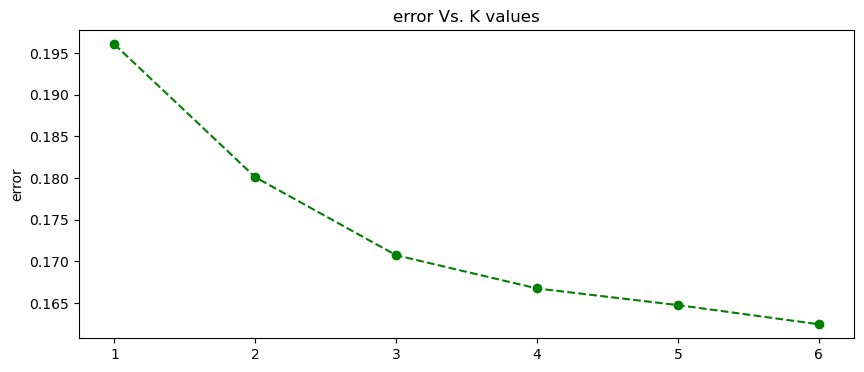

In [92]:
err=[]
for i in range(1,7):
    knn=KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    err.append(np.mean(pred!=y_test))
plt.figure(figsize=(10,4))
plt.plot(range(1,7),err,color='g',linestyle='dashed',marker='o')
plt.ylabel('error')
plt.title('error Vs. K values')
plt.show()


In [93]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
model=KNN.fit(x_train,y_train)

# 2.Bulid a KNN classification model by fitting the training dataset.

In [94]:
model=KNN.fit(x_train,y_train)
model.score(x_train,y_train)

0.878531941031941

# 3.Predict the income of the test dataset using your model.

In [95]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

# Task 4: Model Evaluation.

# 1.Estimate the classifer performance using attribute.score() from the testing data.

In [96]:
model.score(x_test,y_test)

0.8352525717795178

# 2. Estimate the classifer performance usng accuracy_score() from the test data and the predict data and interpret your observation from the scores.

In [97]:
from sklearn.metrics import accuracy_score
print('Accuracy_score',accuracy_score(y_test,y_pred))

Accuracy_score 0.8352525717795178
